# Connected Components

The purpose of this assignment is to familiarize yourself with the handling of graph data structures. You will implement depth-first search for identifying the connected components of an undirected graph, implementing procedure Search as a subroutine along the way.

You will use the [NetworkX](https://networkx.github.io/) Python package to represent and manipulate graphs. You should first familiarize yourself with its functionality by going through the brief [tutorial](https://networkx.org/documentation/stable/tutorial.html). For this homework, you may only use the basic undirected graph methods listed [here](https://networkx.org/documentation/stable/reference/classes/graph.html).

As a use case, we will work with a dataset recording the interactions between characters in Homer's *Iliad*.

In [1]:
import networkx
homer = open('homer.dat')

The format of the data is straightforward. After some comment lines (beginning with \*), the file lists a codename for each character (i.e., node of the graph), followed by a description. The file then lists the groups of characters that interact in each chapter, from which you will form the edges. For instance, the first line has the form:

```1:CH,AG,ME,GS;AP,CH;HE,AC;AC,AG,CA;HE,AT;AT,AC;AT,OG;NE,AG,AC;CS,OD```

This means that CH,AG,ME,GS interacted, so there are edges for all pairs of these nodes. Groups of characters that interacted are separated by semicolons. The lines start with chapter information of the form `1:` or `&:`, which can be ignored for this problem.

In [2]:
#DELETE THIS ONCE DONE WITH ASSIGNMENT

# Open the file
homer_file = open('homer.dat', 'r')

# Read and print the first 5 lines
for i in range(1000):
    line = homer_file.readline()
    print(line)

# Close the file when you're done
#homer_file.close()

* File "homer.dat" from the Stanford GraphBase (C) 1992 Stanford University

* $\rm I\Lambda IA\Delta O\Sigma$, by Homer

* This file may be freely copied but please do not change it in any way!

* (Checksum parameters 670,795252274)

AA Aethra, Trojan lady in waiting

AB Abarbarea, Trojan fountain nymph

AC Achilles, angry warrior, swift-footed chief of Myrmidons from Phthia

AD Automedon, charioteer of AC

AE Aeneas, leader of Dardanians

AF Aphrodite (Venus), daughter of ZE and DN, roots for Trojans

AG Agamemnon, king of Argos and Mycenae, leader of Greek forces

AH Andromache, wife of HT

AI Anchises, father of AE

AJ Great Ajax, king of Salamis

AL Antilochus, son of NE

AM Artemis (Cynthia/Diana), daughter of ZE and LE, roots for Trojans

AN Antenor, aged councilor to PR

AO Agenor, heir of AN, assists AE

AP Apollo, son of ZE and LE, roots for Trojans

AR Ares (Mars), son of ZE, roots for Trojans

AS Atreus, high king, father of AG and ME

AT Athene (Minerva), daughter of ZE, f

First implement a function to read in the nodes from the input file. You may implement any auxiliary functions as needed, and are encouraged to use small functions with specific purposes to keep your code readable. Any function you implement should be clearly commented.

Next implement a function to read in the edges from the input file.

In [3]:
def read_nodes(gfile):
    """Reads in the nodes of the graph from the input file.
    
    Args:
        gfile: A handle for the file containing the graph data, starting at the top.
        
    Returns:
        A list of the nodes in the graph of the form:
            ['AA', 'AB', 'AC', ...]
    """
    # Move the file pointer to the beginning of the file
    gfile.seek(0)
    
    nodes = []

    for line in gfile:
        
        # Skip empty lines, comments, and chapter information
        if not line.isspace() or line.startswith('*') or line.startswith('&') or ':' in line:
            continue

        # Split the line at the comma and take the first part
        character_name = line[:2]
        nodes.append(character_name)

    return nodes

    pass

In [4]:
print(read_nodes(homer))
print(len(read_nodes(homer)))

['\n']
1


In [5]:
def read_edges(gfile):
    """Reads in the edges of the graph from the input file, removing numbers and colons from the lines.

    Args:
        gfile: A handle for the file containing the graph data, starting at the top of the edges section.

    Returns:
        The edges in the graph as a list of pairs.
    """
    edges = []
    
    # Move the file pointer to the beginning of the file
    gfile.seek(0)

    for line in gfile:
        
        if not line.isspace():
            continue
        if ':' in line:
            # Extract chapter information by splitting at ':'
            _, chapter_data = line.split(':')
            # Split the chapter data by ';' to get character groups
            character_groups = chapter_data.split(';')
            for group in character_groups:
                # Split the group by ',' to get characters
                characters = group.split(',')
                # Create edges for all pairs of characters in the group
                group_edges = []
                for i in range(len(characters)):
                    for j in range(i + 1, len(characters)):
                        group_edges.append((characters[i], characters[j]))  
                edges.extend(group_edges)

    return edges

    pass

In [6]:
def read_edges(gfile):
    """Reads in the edges of the graph from the input file, removing numbers and colons from the lines.

    Args:
        gfile: A handle for the file containing the graph data, starting at the top of the edges section.

    Returns:
        The edges in the graph as a list of pairs.
    """
    edges = []
    
    # Move the file pointer to the beginning of the file
    gfile.seek(0)

    for line in gfile:
        # Remove leading/trailing whitespace
        line = line.strip()  

        # Skip blank lines and comment lines
        if not line or line.startswith('*'):
            continue  

        if ':' in line:
            # Extract chapter information by splitting at ':'
            _, chapter_data = line.split(':')
            # Split the chapter data by ';' to get character groups
            character_groups = chapter_data.split(';')
            for group in character_groups:
                # Split the group by ',' to get characters
                characters = group.split(',')
                # Create edges for all pairs of characters in the group
                for i in range(len(characters)):
                    for j in range(i + 1, len(characters)):
                        edges.append((characters[i], characters[j]))  

    return edges

    pass

In [7]:
print(read_edges(homer))

[('CH', 'AG'), ('CH', 'ME'), ('CH', 'GS'), ('AG', 'ME'), ('AG', 'GS'), ('ME', 'GS'), ('AP', 'CH'), ('HE', 'AC'), ('AC', 'AG'), ('AC', 'CA'), ('AG', 'CA'), ('HE', 'AT'), ('AT', 'AC'), ('AT', 'OG'), ('NE', 'AG'), ('NE', 'AC'), ('AG', 'AC'), ('CS', 'OD'), ('TA', 'EB'), ('TA', 'PA'), ('TA', 'AC'), ('TA', 'BR'), ('EB', 'PA'), ('EB', 'AC'), ('EB', 'BR'), ('PA', 'AC'), ('PA', 'BR'), ('AC', 'BR'), ('TH', 'PO'), ('AC', '2I'), ('AC', 'TH'), ('AC', 'PE'), ('TH', 'PE'), ('TH', 'AZ'), ('AZ', 'ZE'), ('CS', 'OD'), ('CS', 'CH'), ('OD', 'CH'), ('ZE', 'OG'), ('TH', 'ZE'), ('ZE', 'HE'), ('HE', 'HP'), ('HP', 'OG'), ('HP', 'ZE'), ('ZE', 'FD'), ('FD', 'AG'), ('EO', 'OG'), ('AG', 'NE'), ('RU', 'GS'), ('HP', 'ZE'), ('ZE', 'HM'), ('HM', 'PC'), ('PC', 'AS'), ('AS', 'TY'), ('TY', 'AG'), ('AG', 'GS'), ('HE', 'AT'), ('AT', 'OD'), ('OD', 'EB'), ('OD', 'GS'), ('TR', 'OD'), ('TR', 'AC'), ('OD', 'AC'), ('TR', 'GS'), ('OD', 'TR'), ('OD', 'AT'), ('OD', 'GS'), ('AT', 'GS'), ('CA', 'GS'), ('NE', 'GS'), ('NE', 'AG'), ('GS'

The following code should now correctly create the graph.

In [8]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(read_nodes(homer))
G.add_edges_from(read_edges(homer))

Number of nodes: 557
Number of edges: 1629


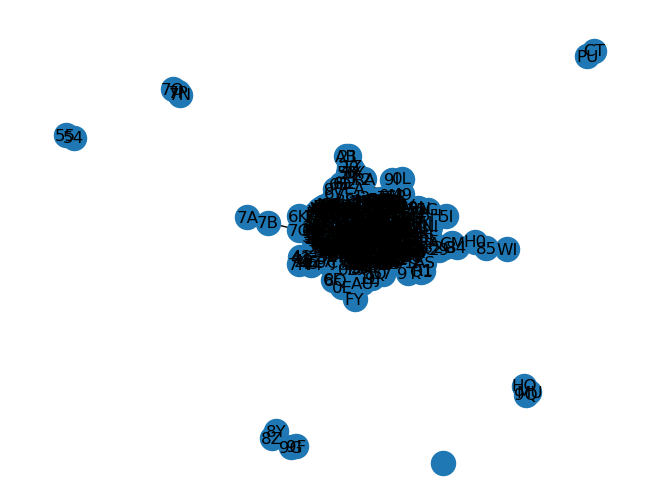

In [9]:
#DELETE BEFORE SUBMITTING CODE
import matplotlib.pyplot as plt
# Get the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Visualize the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True)
plt.show()

Next implement procedure Search. The function takes in a graph and a root node, and returns a list of the nodes visited during the search. The nodes should appear in the order in which they were *first visited*. The neighbors of a node should be processed in *alphabetical order*, where numbers come before letters. This will ensure that the output of your function is uniquely defined, given any input node.

In [10]:
def Search(graph, root):
    """Runs Search from vertex root in a graph. Neighboring nodes are processed in alphabetical order.
    
    Args:
        graph: the given graph, with nodes encoded as strings.
        root: the node from which to start the search.
        
    Returns:
        A list of nodes in the order in which they were first visited.
    """
    visited = set()
    visit_order = []

    def helper(node, visited):
        visited.add(node)
        visit_order.append(node)

        # Sort the neighbors alphabetically
        sorted_neighbors = sorted(graph.neighbors(node))
        
        for neighbor in sorted_neighbors:
            if neighbor not in visited:
                helper(neighbor, visited)

    helper(root, visited)
    
    return visit_order  

We will check the correctness of your code by verifying that it correctly computes the connected component of node Ulysses (node `OD`).

In [11]:
ulysses = Search(G, 'OD')

In [12]:
print(ulysses)

['OD', '0X', '1M', '1N', '1O', '1P', '1Q', '1R', '1S', '23', '2X', 'DI', '03', '04', '05', 'AG', '0D', '0E', '1H', '26', '32', '33', '34', '35', 'AC', '0M', '0L', '2I', 'AH', '2J', 'HT', '02', '01', 'AE', '0F', '07', '08', '0G', '0H', '0I', '0J', '0K', '3V', 'AJ', '0W', '1J', '1U', '3N', '3O', '3P', '3Q', '3R', '47', '4P', '4V', '4Y', '5T', '6M', '6N', '8W', '8T', '8U', '8V', '8X', 'NE', '5A', '57', 'PO', '1K', '0P', '0N', '0O', '0Q', '0R', '0S', 'AA', 'AF', 'AI', '3T', '4C', 'AO', '31', 'PD', '2W', '4H', '4I', '4J', '4K', '4L', 'PS', '36', '4G', '0C', '1I', 'AL', '06', '3W', '3X', '3Y', '3Z', '40', '93', '44', '45', '46', '92', '94', '22', '41', '42', '43', '95', '6Y', '96', '98', '9A', '9B', '9C', 'AX', '4N', '6R', 'MT', '6I', '6J', '6O', '6Q', 'TU', '24', '2N', '2O', '2P', '2Q', '2R', '2S', '2T', '2U', '2V', '48', '49', 'PR', '0T', '0U', '4A', '4B', 'ID', '11', '59', '7S', '7R', '7T', '9W', '9V', '9X', 'AR', '2C', '2B', '2A', 'BL', '29', '83', 'ZE', '1F', '1G', 'OG', '87', 'DT', 'SE

Next implement DFS to find the connected components of the character graph. When choosing roots for your components, always pick the *smallest unvisited node* according to alphabetical ordering. Combined with your Search routine, this will ensure that the output is again uniquely defined.

In [13]:
def connected_components(graph):
    """Computes the connected components of the given graph.
    
    Args: 
        graph: the given graph, with nodes encoded as strings.
        
    Returns:
        The connected components of the graph. Components are listed in
        alphabetical order of their root nodes.
    """
    components = []
    visited = set()

    def DFS(node):
        component = Search(graph, node)
        components.append(component)
        visited.update(component)

    nodes = sorted(graph.nodes())
    
    for node in nodes:
        if node not in visited:
            DFS(node)

    return components

    pass

We will check correctness of your code by verifying that your output is identical to our solution.

In [14]:
character_interactions = connected_components(G)

In [15]:
print(character_interactions)

[['\n'], ['01', '02', '09', '0A', '9K', '7R', '7S', '7T', '9W', '9V', '9X', 'AE', '0F', '07', '08', '0G', '0H', '0I', '0J', '0K', '3V', 'AC', '0M', '0L', '2I', 'AH', '2J', 'HT', '2K', 'DI', '03', '04', '05', 'AG', '0D', '0E', '1H', '26', '32', '33', '34', '35', '8M', 'AJ', '0W', '1J', '1U', '3N', '3O', '3P', '3Q', '3R', '47', '4P', '4V', '4Y', '5T', '6M', '6N', '8W', '8T', '8U', '8V', '8X', 'NE', '5A', '57', 'PO', '1K', '0P', '0N', '0O', '0Q', '0R', '0S', 'AA', 'AF', 'AI', '3T', '4C', 'AO', '31', 'PD', '2W', '4H', '4I', '4J', '4K', '4L', 'PS', '36', '4G', '0C', '1I', 'AL', '06', '3W', '3X', '3Y', '3Z', '40', '93', '44', '45', '46', '92', '94', '22', '41', '42', '43', '95', '6Y', '96', '98', '9A', '9B', '9C', 'AX', '4N', '6R', 'MT', '6I', '6J', '6O', '6Q', 'TU', '24', '2N', '2O', '2P', '2Q', '2R', '2S', '2T', '2U', '2V', '48', '49', 'PR', '0T', '0U', '4A', '4B', 'ID', '11', '59', 'AP', '2Z', '53', 'AM', '12', 'ME', '4F', '4U', '6B', '8G', '8H', 'A0', 'MG', '15', '14', '2H', 'AT', '13', 

As a preliminary check, you should find that the following statements are all true.

In [16]:
component_sizes = [len(c) for c in character_interactions]
print("There are 12 connected components in the Iliad:{}".format(len(component_sizes) == 12))
print("The giant component has size 542:{}".format(max(component_sizes) == 542))
print("There are 5 isolated characters:{}".format(len([c for c in component_sizes if c == 1]) == 5))

There are 12 connected components in the Iliad:False
The giant component has size 542:True
There are 5 isolated characters:False
